# 1.0 Regression

###   1.1 Data Import 

In [95]:
import pandas as pd
import numpy as np

In [96]:
file_path = 'final/transactions_0.csv'

df_init = pd.read_csv(file_path, sep='|')

In [97]:
# Looping through file_1 to file_132 and merging with file_0
for i in range(1, 132):
    df_latter = pd.read_csv(f'final/transactions_{i}.csv', sep='|')
    df_init = pd.concat([df_init, df_latter], axis = 0)

In [98]:
df_transaction = df_init.copy()
df_transaction.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [222]:
file_path = 'final/customers.csv'

df_customers = pd.read_csv(file_path, sep='|')
df_customers.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [223]:
df_eda_transaction = df_transaction.copy()

# EDA

In [224]:
from datetime import datetime

df_eda_cust = df_customers.copy()
#df_eda_cust = df_eda_cust.drop(['ssn', 'first', 'last', 'street', 'city', 'state', 'zip', 
                                #'city_pop', 'job', 'acct_num'], axis = 1)



In [225]:
# Calculate the age column
from datetime import datetime

# Function to calculate age
def calculate_age(date_of_birth):
    current_date = datetime.now()
    dob = datetime.strptime(date_of_birth, "%Y-%m-%d")
    age = current_date.year - dob.year
    if current_date.month < dob.month or (current_date.month == dob.month and current_date.day < dob.day):
        age -= 1
    return age

# Apply calculate_age() function to 'dob' column
df_eda_cust['age'] = df_eda_cust['dob'].apply(calculate_age)
df_eda_cust = df_eda_cust.drop(['dob'], axis = 1)

df_eda_cust

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,acct_num,age
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,888022315787,63
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,917558277935,59
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,718172762479,49
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,947268892251,80
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,888335239225,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,392-96-7670,30125158904184,Sarah,Martin,F,1666 Jenna Unions,Denver,CO,80236,39.6535,-105.0376,990452,Colour technologist,201218361926,29
996,594-17-7993,180047909863618,Erin,Wells,F,444 Alexis Estate Suite 824,Wasco,CA,93280,35.6480,-119.4487,27152,Software engineer,921460407733,40
997,196-93-1156,4371450311809,Michael,James,M,914 Cassandra Gateway Suite 061,Escondido,CA,92026,33.1605,-117.0978,171802,Agricultural consultant,499348764671,24
998,895-65-9304,3519925692476886,Michael,Lewis,M,34141 Katelyn Path,Mattapan,MA,2126,42.2739,-71.0939,25562,Civil Service administrator,617852071065,29


In [226]:
df_merge_eda = pd.merge(df_eda_cust, df_eda_transaction, on = 'cc_num')
df_merge_eda

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,age,acct_num_y,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,63,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,63,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,63,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,63,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,63,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,80,298026601683,4eafc5b16da625c3436f2484d8dcabcb,1627636943,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,80,298026601683,041b18f68b893b68e7aa29c16a08a08d,1624880326,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,80,298026601683,a26df5348dfee4839f0fa00155e2ed1c,1629797869,health_fitness,5.82,0,White LLC,27.110602,-82.426821
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,80,298026601683,e388fc8055b1426c62640baaae10108f,1629976595,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797


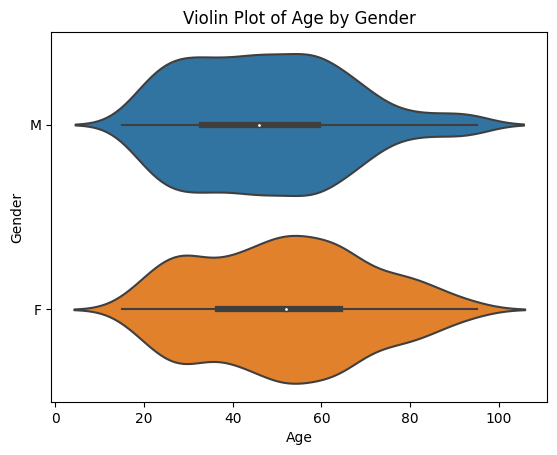

In [227]:
#Violin Plots

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns: 'Gender' and 'Age'

# Create a violin plot
sns.violinplot(x='age', y='gender', data=df_eda_cust)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Gender')
plt.title('Violin Plot of Age by Gender')

# Show the plot
plt.show()

In [228]:
from datetime import datetime

frequency = df_merge_eda.groupby('cc_num')['cc_num'].count()
monetary = df_merge_eda.groupby('cc_num')['amt'].mean()

viz_df = pd.DataFrame({
    'Frequency': frequency,
    'Recency': recency,
    'Total_amt': monetary
}).reset_index()

In [229]:
viz_df = pd.merge(viz_df, df_eda_cust, on = 'cc_num' )
viz_df

,cc_num,Frequency,Recency,Total_amt,ssn,first,last,gender,street,city,state,zip,lat,long,city_pop,job,acct_num,age
0,60400268763,5101,49.266667,64.725326,819-37-7864,Eric,Gardner,M,6497 Mclean Corners Suite 365,Mobile,AL,36617,30.7145,-88.0918,270712,Physiological scientist,279317935556,65
1,60406155816,6910,79.966667,85.642334,133-78-8844,Mary,Stone,F,328 Heath Forks Suite 255,Battle Creek,MI,49017,42.3322,-85.1811,92270,Patent attorney,606516448533,28
2,60429276409,7631,11.433333,59.632310,719-30-3794,Ethan,Massey,M,862 Carlos Centers,Rochester,NH,3867,43.3092,-71.0558,29816,Marine scientist,236511963610,43
3,60432200743,5454,11.183333,64.075141,565-81-7469,Justin,Gilbert,M,3871 Chelsea Corners,Bronx,NY,10471,40.9011,-73.9053,1382480,Hotel manager,203300890197,64
4,60434956110,9476,8.133333,87.626355,755-11-1150,Lindsay,Cannon,F,1181 Shaw Summit Suite 466,Brooklyn,NY,11237,40.7006,-73.9180,2504700,Camera operator,800203770568,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,4966177182498980888,3639,172.650000,67.138972,033-25-4738,Tina,Blair,F,8214 Scott Loop Apt. 359,Roanoke,TX,76262,33.0211,-97.2127,27648,Electrical engineer,433444305880,66
979,4967150066664110652,7630,3.616667,89.044484,187-01-6064,Elizabeth,Miller,F,340 Weaver Courts,Westborough,MA,1581,42.2679,-71.6176,18272,Oceanographer,900285783712,32
980,4968827697040953141,4384,207.750000,65.724115,512-87-9674,Summer,Davis,F,56078 Gregory Haven Apt. 565,Fort Lauderdale,FL,33319,26.1848,-80.2406,711693,Clinical biochemist,637631873395,93
981,4983665528993160877,5096,33.516667,66.797963,390-74-0028,Emily,Cabrera,F,77294 Julie Vista Apt. 954,Strongsville,OH,44136,41.3132,-81.8285,44785,Retail buyer,760167701011,83


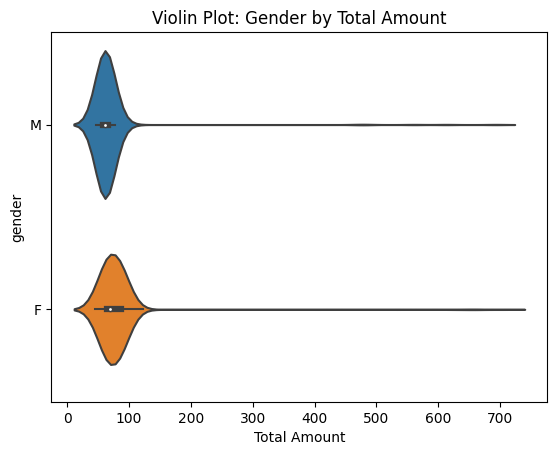

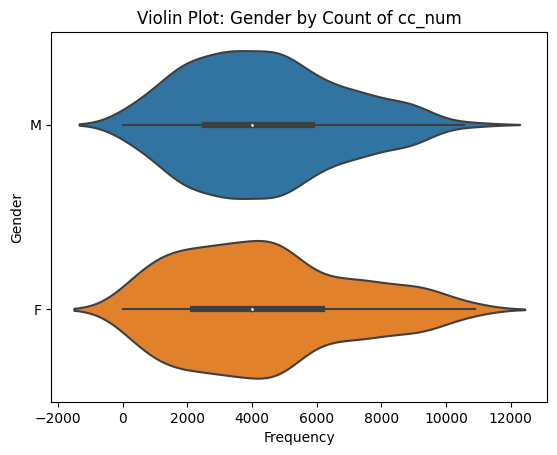

In [230]:
sns.violinplot(x='Total_amt', y='gender', data=viz_df)
plt.xlabel('Total Amount')
plt.ylabel('gender')
plt.title('Violin Plot: Gender by Total Amount')
plt.show()

# Create violin plot for Gender by count of cc_num
sns.violinplot(y='gender', x='Frequency', data=viz_df)
plt.xlabel('Frequency')
plt.ylabel('Gender')
plt.title('Violin Plot: Gender by Count of cc_num')
plt.show()

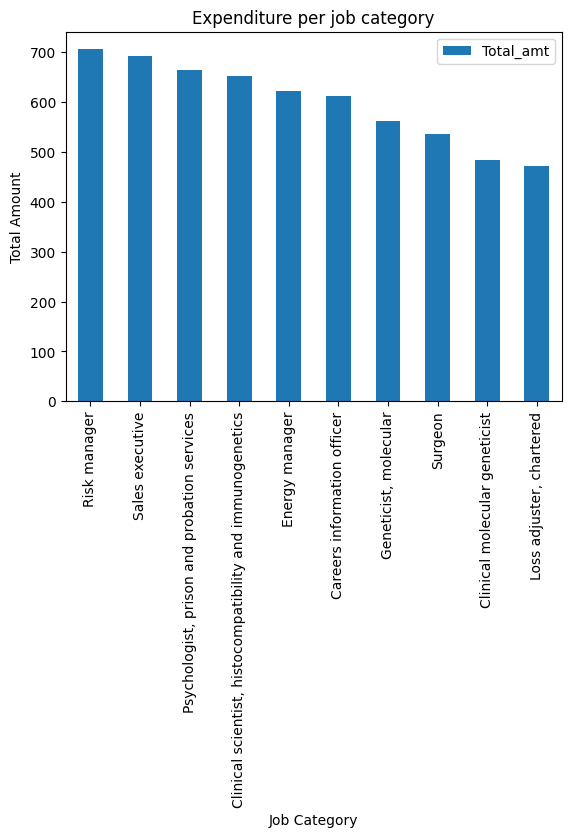

In [231]:
top_10_jobs = viz_df.nlargest(10, 'Total_amt')

# Print the filtered DataFrame
top_10_jobs

top_10_jobs.plot.bar(x='job', y='Total_amt')

# Set the labels and title for the graph
plt.xlabel('Job Category')
plt.ylabel('Total Amount')
plt.title('Expenditure per job category')

# Display the graph
plt.show()

### 1.2 DataFrame Manipulations 

In [232]:
df_customers_1 = df_customers.copy()
df_customers_1 = df_customers_1.drop(['ssn', 'first', 'last', 'street', 'city', 'state', 'zip', 
                                'city_pop', 'job', 'acct_num'], axis = 1)
df_customers_1.head()

,cc_num,gender,lat,long,dob
0,4218196001337,M,40.1809,-75.2156,1959-10-03
1,4351161559407816183,F,34.2680,-78.0578,1963-06-07
2,4192832764832,M,33.4275,-80.8857,1973-05-30
3,4238849696532874,M,33.3813,-86.7046,1942-12-26
4,4514627048281480,F,30.7166,-82.5801,1939-05-22


In [233]:
# Calculate the age column
from datetime import datetime

# Function to calculate age
def calculate_age(date_of_birth):
    current_date = datetime.now()
    dob = datetime.strptime(date_of_birth, "%Y-%m-%d")
    age = current_date.year - dob.year
    if current_date.month < dob.month or (current_date.month == dob.month and current_date.day < dob.day):
        age -= 1
    return age

# Apply calculate_age() function to 'dob' column
df_customers_1['age'] = df_customers_1['dob'].apply(calculate_age)
df_customers_1 = df_customers_1.drop(['dob'], axis = 1)

df_customers_1

,cc_num,gender,lat,long,age
0,4218196001337,M,40.1809,-75.2156,63
1,4351161559407816183,F,34.2680,-78.0578,59
2,4192832764832,M,33.4275,-80.8857,49
3,4238849696532874,M,33.3813,-86.7046,80
4,4514627048281480,F,30.7166,-82.5801,84
...,...,...,...,...,...
995,30125158904184,F,39.6535,-105.0376,29
996,180047909863618,F,35.6480,-119.4487,40
997,4371450311809,M,33.1605,-117.0978,24
998,3519925692476886,M,42.2739,-71.0939,29


In [234]:
df_transaction_1 = df_transaction.copy()

df_transaction_frequency = pd.DataFrame(df_transaction_1.groupby('cc_num')['cc_num'].count())

df_transaction_frequency = df_transaction_frequency.rename(columns={df_transaction_frequency.columns[0]: 'frequency'})

df_transaction_frequency

,frequency
cc_num,
60400268763,5101
60406155816,6910
60429276409,7631
60432200743,5454
60434956110,9476
...,...
4966177182498980888,3639
4967150066664110652,7630
4968827697040953141,4384


### 1.3 Frequency & Cust Merge 

In [235]:
df_merged_1 =  pd.merge(df_customers_1, df_transaction_frequency, on='cc_num')
df_merged_1.head()

,cc_num,gender,lat,long,age,frequency
0,4218196001337,M,40.1809,-75.2156,63,3278
1,4351161559407816183,F,34.2680,-78.0578,59,1471
2,4192832764832,M,33.4275,-80.8857,49,5812
3,4238849696532874,M,33.3813,-86.7046,80,2920
4,4514627048281480,F,30.7166,-82.5801,84,6556


### 1.4 Feature Engineering

In [236]:
#Mapping Gender
gender_mapping = {'M': 0, 'F': 1}
df_merged_1['gender'] = df_merged_1['gender'].map(gender_mapping)

### 1.5 Standardisation 

In [237]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [238]:
y = df_merged_1.pop('frequency')


In [239]:
feat_list = ['gender', 'lat', 'long', 'age']
X = scaler.fit_transform(df_merged_1[feat_list])
X

array([[-1.02367801,  0.50049998,  0.98827081,  0.72648245],
       [ 0.97686967, -0.55674541,  0.82603661,  0.51251024],
       [-1.02367801, -0.70702949,  0.66461865, -0.02242028],
       ...,
       [-1.02367801, -0.75476994, -1.40238623, -1.3597466 ],
       [-1.02367801,  0.87473506,  1.22353952, -1.09228134],
       [-1.02367801, -1.71506823,  0.55967044,  1.63586435]])

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (786, 4) (786,)
Test set shape: (197, 4) (197,)


## 1.6 Modelling

### 1.6.1 Decision Tree Regression Model 

In [279]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
print(mse(y_test, y_pred, squared=False))
print(mae(y_test, y_pred))


2280.275276242628
1946.3928980021135


In [242]:
import altair as alt

perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_pred})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

In [243]:
feature_importances = regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': ['gender', 'lat', 'long', 'age'], 'Importance': feature_importances})
importance_df

,Feature,Importance
0,gender,0.015108
1,lat,0.266169
2,long,0.229042
3,age,0.489681


### 1.6.2 Random Forest Regression Model 

In [244]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
print(mse(y_test, y_pred, squared=False))
print(mae(y_test, y_pred))

2298.579173978004
1966.572098138748


In [245]:
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_pred})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

In [246]:
feature_importances = regressor.feature_importances_

importance_df = pd.DataFrame({'Feature': ['gender', 'lat', 'long', 'age'], 'Importance': feature_importances})
importance_df

,Feature,Importance
0,gender,0.027430
1,lat,0.257104
2,long,0.242625
3,age,0.472840


### 1.6.3 Univariate Linear Regression Model 

In [247]:
feat_list = ['age']
X = df_merged_1[feat_list].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (786, 1) (786,)
Test set shape: (197, 1) (197,)


In [249]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error (MSE)
print(mse(y_test, y_pred, squared=False))
print(mae(y_test, y_pred))

2278.6796873658463
1942.404087205746


In [250]:
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='green').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_pred})).mark_line().encode(
    x='target',
    y='preds'
  )

pred_chart_test + perfect_test

alt.LayerChart(...)

# 2.0 Clustering 

In [251]:
df_customers_1 = df_customers.copy()
df_customers_1 = df_customers_1.drop(['ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 
                                'city_pop', 'job', 'dob', 'acct_num'], axis = 1)
df_customers_1.head()

,cc_num
0,4218196001337
1,4351161559407816183
2,4192832764832
3,4238849696532874
4,4514627048281480


In [252]:
df_transaction_1 = df_transaction.copy()

df_transaction_1 = df_transaction_1[['cc_num','unix_time','amt']]

df_transaction_1.head()

,cc_num,unix_time,amt
0,4218196001337,1558719550,69.12
1,4218196001337,1569425519,68.11
2,4218196001337,1577205601,40.35
3,4218196001337,1571428238,96.22
4,4218196001337,1549840400,71.89


### 2.1 Transaction & Cust Merge

In [253]:
df_merged_1 =  pd.merge(df_customers_1, df_transaction_1, on='cc_num')
df_merged_1.head()

,cc_num,unix_time,amt
0,4218196001337,1558719550,69.12
1,4218196001337,1569425519,68.11
2,4218196001337,1577205601,40.35
3,4218196001337,1571428238,96.22
4,4218196001337,1549840400,71.89


In [254]:
# Convert Unix time to datetime
df_merged_1['Datetime'] = pd.to_datetime(df_merged_1['unix_time'], unit='s')

# Extract the date from the datetime column
df_merged_1['Month'] = df_merged_1['Datetime'].dt.month

In [255]:
df_merged_1.head()

,cc_num,unix_time,amt,Datetime,Month
0,4218196001337,1558719550,69.12,2019-05-24 17:39:10,5
1,4218196001337,1569425519,68.11,2019-09-25 15:31:59,9
2,4218196001337,1577205601,40.35,2019-12-24 16:40:01,12
3,4218196001337,1571428238,96.22,2019-10-18 19:50:38,10
4,4218196001337,1549840400,71.89,2019-02-10 23:13:20,2


### 2.2 Prepping columns for RFM 

In [256]:
from datetime import datetime

latest_date = df_merged_1['Datetime'].max()

frequency = df_merged_1.groupby('cc_num')['cc_num'].count()
recency = (latest_date - df_merged_1.groupby('cc_num')['Datetime'].max()).dt.total_seconds() / 60
monetary = df_merged_1.groupby('cc_num')['amt'].mean()

In [257]:
# Create a new DataFrame with Frequency, Recency, and Monetary columns
result_df = pd.DataFrame({
    'Frequency': frequency,
    'Recency': recency,
    'Monetary': monetary
}).reset_index()

# Print the resulting DataFrame
result_df['Month'] = df_merged_1['Month'].copy()

In [258]:
columns_to_convert = ['Frequency', 'Monetary']
result_df[columns_to_convert] = result_df[columns_to_convert].astype('float64')

### 2.3 Performing Kmeans 

In [259]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [260]:
feat_list = ['Frequency', 'Recency', 'Monetary']

In [261]:
X = scaler.fit_transform(result_df[feat_list])
X

array([[ 0.30673339, -0.07757112, -0.16001659],
       [ 1.03073517, -0.07721983,  0.21125863],
       [ 1.31929531, -0.07800405, -0.25041722],
       ...,
       [ 0.01977415, -0.07575761, -0.14228818],
       [ 0.30473228, -0.07775135, -0.12322746],
       [-1.16168149, -0.07783793, -0.38786592]])

In [262]:
cluster_df = pd.DataFrame()
inertia_list = []

In [263]:
cluster_df['nb_cluster'] = range(1, 21)
cluster_df

,nb_cluster
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [264]:
from sklearn.cluster import KMeans

In [265]:
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8).fit(X)
    inertia_list.append(kmeans.inertia_)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

In [266]:
cluster_df['inertia'] = inertia_list

In [267]:
import altair as alt

In [268]:
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

In [269]:
k = 5

In [270]:
kmeans = KMeans(random_state=1, n_clusters=k)

In [271]:
kmeans.fit(X)

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [272]:
result_df['kmeans'] = kmeans.predict(X)

In [273]:
result_df

,cc_num,Frequency,Recency,Monetary,Month,kmeans
0,60400268763,5101.0,49.266667,64.725326,5,1
1,60406155816,6910.0,79.966667,85.642334,9,4
2,60429276409,7631.0,11.433333,59.632310,12,4
3,60432200743,5454.0,11.183333,64.075141,10,1
4,60434956110,9476.0,8.133333,87.626355,2,4
...,...,...,...,...,...,...
978,4966177182498980888,3639.0,172.650000,67.138972,11,1
979,4967150066664110652,7630.0,3.616667,89.044484,7,4
980,4968827697040953141,4384.0,207.750000,65.724115,5,1
981,4983665528993160877,5096.0,33.516667,66.797963,5,1


In [274]:
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]
pairs

[('Frequency', 'Recency'), ('Frequency', 'Monetary'), ('Recency', 'Monetary')]

**[4.5]** Print scatter plots to visualise the clusters



In [275]:
base = alt.Chart(result_df).mark_point().encode(color='kmeans:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

**[4.6]** Display the average of all features for each group

In [276]:
result_df[feat_list + ['kmeans']].groupby('kmeans').mean()

,Frequency,Recency,Monetary
kmeans,,,
0,2034.933504,1.452128e+02,67.121519
1,4837.113111,6.076735e+01,66.334166
2,10.333333,1.450539e+06,535.053315
3,13.000000,2.842160e+05,600.383206
4,8247.255208,3.330313e+01,73.073279
